# Computer Vision - P3

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 30th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

1)	Segmentation of video shots with static scenes.

2) Background substraction.

3)	Segmentation of images.

In order to successfuly complete this practicum it is necessary to understand the following theory concepts: background substraction, K-means clustering, etc.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.

## 3.1 Background substraction methods


Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, remove all the "artifacts" considered as foreground related to movement extracting the background images.

Note: One of the applications of these methods is the button "remove tourists" implemented in most commercial photo cameras. For instance, Adobe uses the "Monument Mode", which automatically deletes the people going by the cameras.

Read and visualize the sequence of images "images/Barcelona-sequence"
Hint: In order to read a  collection of images, we wil use the function animation.FuncAnimation [https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html].

Observe in the following example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

<IPython.core.display.Javascript object>


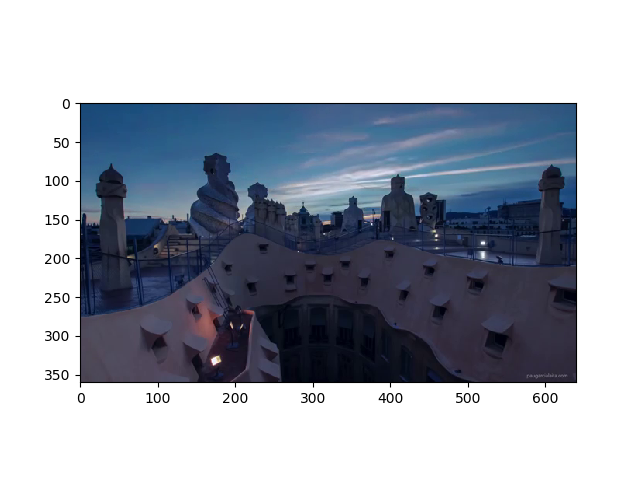

In [3]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt

ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder

import matplotlib.animation as animation
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(ic[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i*5]) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=50, repeat= False)

(2 points) a) Find where a shot (scene) finishes and the following starts (boundaries). Each of the scenes in a video is usually called 'shot'. 

To solve this exercise, you need to create a **temporal plot** showing a frame by frame measure to be defined by you, being applicable to distinguish the shots. 

Execute the following code in "Example A". This created **temporal plot** should replace the temporal plot given as a template. 


**Hint:**
- If you need to convert the image to float, the command is: img_as_float()

- If you need the histogram, it is in skimage.exposure


<IPython.core.display.Javascript object>


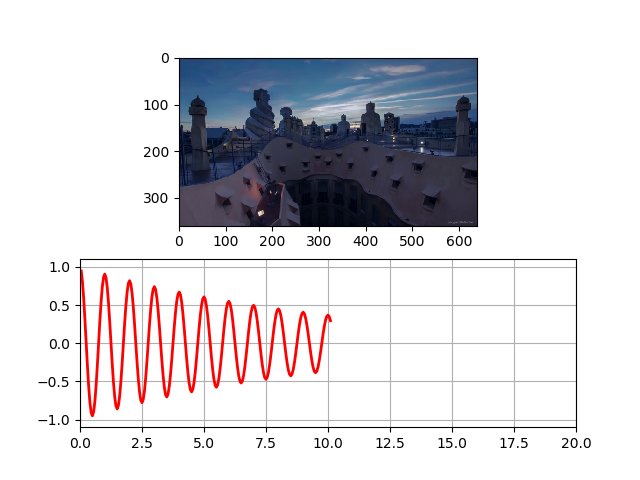

In [4]:
#EXP: Frame Differences
# Example A
# Sinusoidal plot points generation
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        current_frame = ic[cnt]
        
        y = np.cos(2*np.pi*t) * np.exp(-t/10.)
        # adapted the data generator to yield both sin and cos
        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-1.1, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

<IPython.core.display.Javascript object>


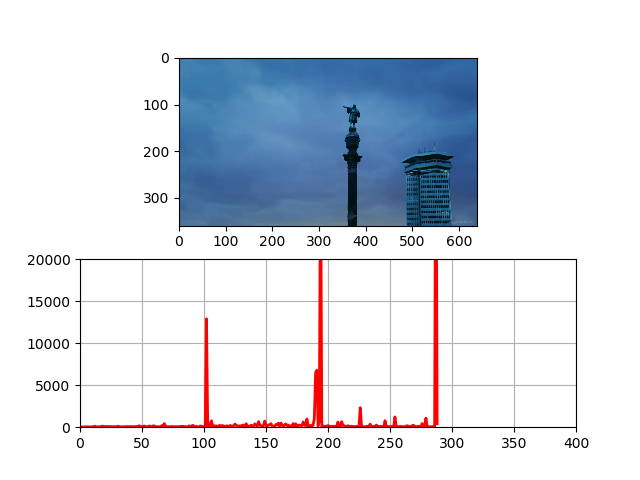

In [7]:
from skimage import exposure
from skimage import img_as_float

def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < (len(ic)-1):
        cnt+=1
        t += 1.0
        im_current = ic[cnt]
        im_next = ic[cnt+1]
    
        current_histogram_R = exposure.histogram( img_as_float(im_current[:,:,0]) , 8 )[0]
        current_histogram_G = exposure.histogram( img_as_float(im_current[:,:,1]) , 8 )[0]
        current_histogram_B = exposure.histogram( img_as_float(im_current[:,:,2]) , 8 )[0]
    
        next_histogram_R = exposure.histogram( img_as_float(im_next[:,:,0]) , 8 )[0]
        next_histogram_G = exposure.histogram( img_as_float(im_next[:,:,1]) , 8 )[0]
        next_histogram_B = exposure.histogram( img_as_float(im_next[:,:,2]) , 8 )[0]
        
        current_RGB = np.concatenate((current_histogram_R, current_histogram_G, current_histogram_B))
        next_RGB = np.concatenate((next_histogram_R, next_histogram_G, next_histogram_B))
        
        y = np.mean( abs(current_RGB - next_RGB) )
        
        #y =  np.mean(abs(current_hist_RED - next_hist_RED) + abs(current_hist_GREEN -  next_hist_GREEN) + abs(current_hist_BLUE - next_hist_BLUE))

        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(0, 20000)
ax2.set_xlim(0, 50)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

(0.5 points) b) Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">


[(101, 103), (193, 195), (286, 288)]    289


<IPython.core.display.Javascript object>


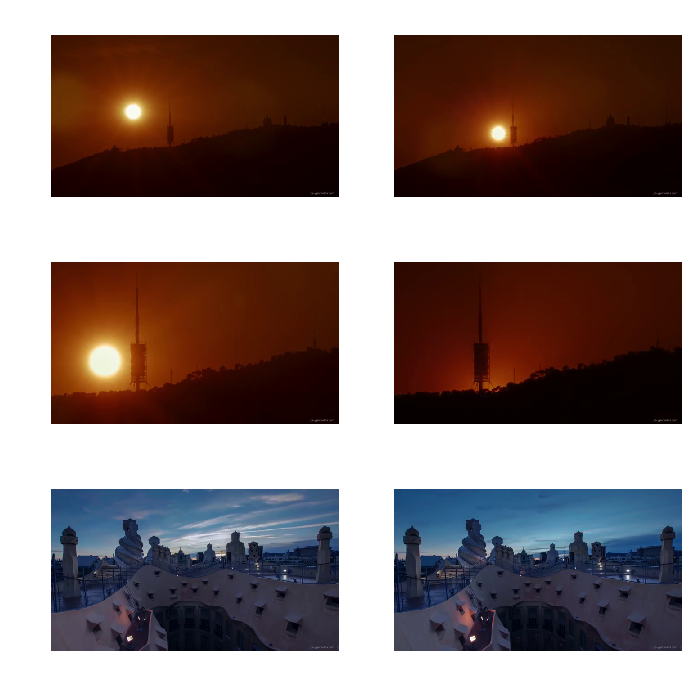

In [8]:
shots = []
t = 10000

for pos,i in enumerate(ydata):
    if i > t:
        shots.append( (pos-1, pos+1) )
print(shots, "  ", len(ydata))

fig, ( (ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(ncols=2,nrows=3,figsize=(7,7))
ax0.imshow( ic[0] )
ax0.axis('off')

ax1.imshow(ic [ shots[0][0] ])
ax1.axis('off')

ax2.imshow(ic [ shots[0][1] ])
ax2.axis('off')

ax3.imshow(ic [ shots[1][0] ])
ax3.axis('off')

ax4.imshow(ic [ shots[1][1] ])
ax4.axis('off')

ax5.imshow(ic [ shots[2][0] ])
ax5.axis('off')

plt.tight_layout()
plt.show()


(0.5 points) c) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

In order to distinguish the shots for the plot, We used the values of the ydata, which marks down when a frame change happens, then, by stating a flag (t=10000) we see if the change is high enough to be a new shot or not. Then, when there's a change in the frames, we collect the previous position and the next position to this change and those are the shots we wanted.

## 3.2 Background substraction

(2) a) Apply the background substraction algorithm (check theory material).

Visualize, for each different scene (there are 3) of the video:

    1) images belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [10]:
## EXP: Background Substraction
# 1st step
import numpy as np
frames_shot1 = np.arange(0, 105+2)
frames_shot2 = np.arange(107, 193+2)
frames_shot3 = np.arange(195, 285+2)

background_1 = np.zeros([360, 640, 3])
background_2 = np.zeros([360, 640, 3])
background_3 = np.zeros([360, 640, 3])

img_1 = []
img_2 = []
img_3 = []

img_1_R = []
img_1_G = []
img_1_B = []

img_2_R = []
img_2_G = []
img_2_B = []

img_3_R = []
img_3_G = []
img_3_B = []

for frame in frames_shot1:
    
    img_1.append(img_as_float(ic[frame]))

    img_1_R.append(img_as_float(ic[frame][:,:,0])) 
    img_1_G.append(img_as_float(ic[frame][:,:,1])) 
    img_1_B.append(img_as_float(ic[frame][:,:,2])) 
    
for frame in frames_shot2:
    
    img_2.append(img_as_float(ic[frame]))

    img_2_R.append(img_as_float(ic[frame][:,:,0])) 
    img_2_G.append(img_as_float(ic[frame][:,:,1])) 
    img_2_B.append(img_as_float(ic[frame][:,:,2])) 
    
for frame in frames_shot3:
    
    img_3.append(img_as_float(ic[frame]))

    img_3_R.append(img_as_float(ic[frame][:,:,0])) 
    img_3_G.append(img_as_float(ic[frame][:,:,1])) 
    img_3_B.append(img_as_float(ic[frame][:,:,2])) 
    
background_1[:,:,0] = np.median(img_1_R,axis=0)
background_1[:,:,1] = np.median(img_1_G,axis=0)
background_1[:,:,2] = np.median(img_1_B,axis=0)

background_2[:,:,0] = np.median(img_2_R,axis=0)
background_2[:,:,1] = np.median(img_2_G,axis=0)
background_2[:,:,2] = np.median(img_2_B,axis=0)

background_3[:,:,0] = np.median(img_3_R,axis=0)
background_3[:,:,1] = np.median(img_3_G,axis=0)
background_3[:,:,2] = np.median(img_3_B,axis=0)

foreground_1= [abs(image - background_1) for image in img_1]
foreground_2= [abs(image - background_2) for image in img_2]
foreground_3= [abs(image - background_3) for image in img_3]

%matplotlib inline

f, grounds = plt.subplots(ncols=3,nrows=3, figsize=(10,10)) 

#Primera Imagen

grounds[0,0].imshow(img_1[0])
grounds[0,0].set_title("OG Frame 1r shot")
grounds[0,0].axis('off')

grounds[0,1].imshow(background_1)
grounds[0,1].set_title("Background Frame 1r shot")
grounds[0,1].axis('off')

grounds[0,2].imshow(foreground_1[0])
grounds[0,2].set_title("Foreground Frame 1r shot")
grounds[0,2].axis('off')

#Segunda Imagen

grounds[1,0].imshow(img_2[0])
grounds[1,0].set_title("OG Frame 2n shot")
grounds[1,0].axis('off')

grounds[1,1].imshow(background_2)
grounds[1,1].set_title("Background Frame 2n shot")
grounds[1,1].axis('off')

grounds[1,2].imshow(foreground_2[0])
grounds[1,2].set_title("Foreground Frame 2n shot")
grounds[1,2].axis('off')

#Tercera Imagen

grounds[2,0].imshow(img_3[0])
grounds[2,0].set_title("OG Frame 3r shot")
grounds[2,0].axis('off')

grounds[2,1].imshow(background_3)
grounds[2,1].set_title("Background Frame 3r shot")
grounds[2,1].axis('off')

grounds[2,2].imshow(foreground_3[0])
grounds[2,2].set_title("Foreground Frame 3r shot")
grounds[2,2].axis('off')

plt.tight_layout()
plt.show()

#red_background

TypeError: list indices must be integers or slices, not tuple

(0.2 points) - What happens if the shots are not correctly extracted? 



(0.2 points) - What happens if you find too many shots in the video? 

(0.3 points) - What do the static background images represent? 

(0.2 points) - In which situations does the algorithm work and in which it does not? 


(0.2 points) - What happens if you substract the background image from the original one?

When this occurs the backgroud and the original are equals because there was no change in the picture in the first place. 

(0.2 points) - Do you see any additional application for this algorithm?

(0.5) **[OPTIONAL]**
Apply the algorithm to some other static video that you found.

## 3.3 Clustering methods on the RGB-XY space

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline)

(0.3 points) a) Read any image from the folder 'images' and segment it using Felzenszwalbs's method. 


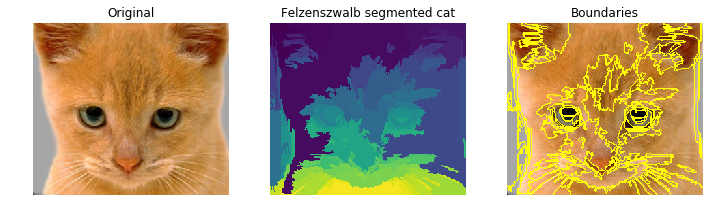

In [28]:
from skimage import segmentation

cat_img = io.imread("images/cat.jpg")
segmented_cat = segmentation.felzenszwalb(cat_img, scale = 100, sigma = 0.5, min_size=50)

%matplotlib inline

f, cat = plt.subplots(ncols=3, figsize=(10,10)) 
cat[0].imshow(cat_img)
cat[0].set_title("Original")
cat[0].axis('off')

cat[1].imshow(segmented_cat)
cat[1].set_title("Felzenszwalb segmented cat")
cat[1].axis('off')

cat[2].imshow(segmentation.mark_boundaries(cat_img, segmented_cat))
cat[2].set_title("Boundaries")
cat[2].axis('off')

plt.tight_layout()
plt.show()

(0.5 points) - Test different parameters in order to obtain a good image segmentation.  Which are the optimal values?

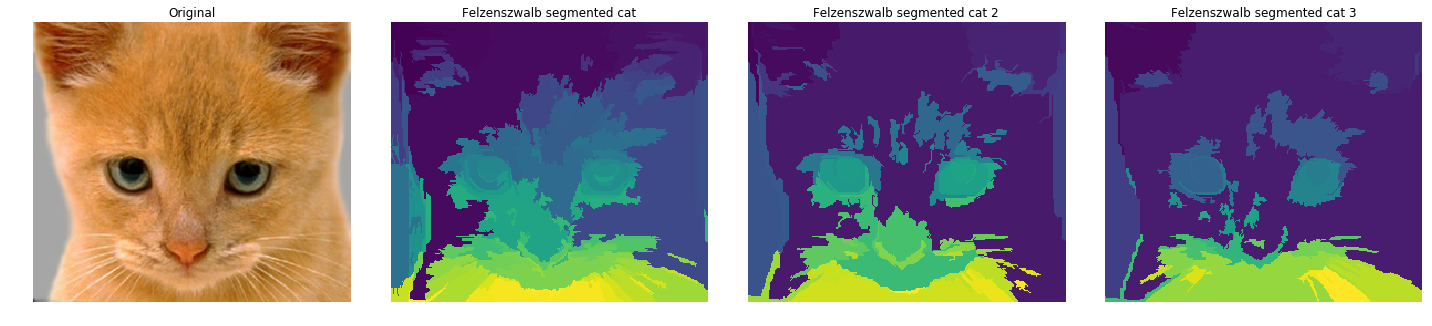

In [33]:
segmented_cat2 = segmentation.felzenszwalb(cat_img, scale = 150, sigma= 1.0, min_size=40)
segmented_cat3 = segmentation.felzenszwalb(cat_img, scale=300, sigma = 0.5, min_size=60)

%matplotlib inline

f, cat = plt.subplots(ncols=4, figsize=(20,10)) 
cat[0].imshow(cat_img)
cat[0].set_title("Original")
cat[0].axis('off')

cat[1].imshow(segmented_cat)
cat[1].set_title("Felzenszwalb segmented cat")
cat[1].axis('off')

cat[2].imshow(segmented_cat2)
cat[2].set_title("Felzenszwalb segmented cat 2")
cat[2].axis('off')

cat[3].imshow(segmented_cat3)
cat[3].set_title("Felzenszwalb segmented cat 3")
cat[3].axis('off')

plt.tight_layout()
plt.show()


#We can observe that the higher the sigma the lesser we can see the form of the cat, also the higher the number of clusters
#the less we can observe the cat itself

(0.3 points) - How does each parameter behave?

First We find the image parameter, we do not need to say anymore about it. Next, We have the scale parameter, this parameter  indicates the number of clusters we want to use, the higher the number the larger the clusters will be. Then the sigma is the width of the Gaussian used in the postprocessing and the min_size is the minimum component size.

(0.2 points) - Comment what algorithm is the method based in up to 3 lines most.

(0.3 points) b) Segment the previous image using SLIC algorithm. 

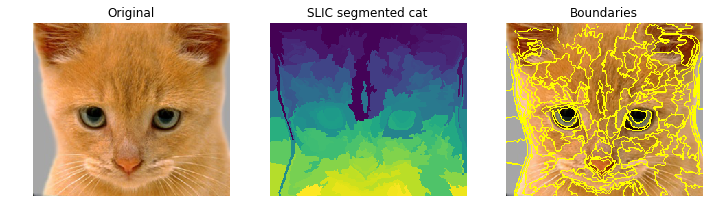

In [35]:
segmented_cat_slic = segmentation.slic(cat_img, n_segments=200, compactness=1, sigma=1)
%matplotlib inline

f, cat = plt.subplots(ncols=3, figsize=(10,10)) 
cat[0].imshow(cat_img)
cat[0].set_title("Original")
cat[0].axis('off')

cat[1].imshow(segmented_cat_slic)
cat[1].set_title("SLIC segmented cat")
cat[1].axis('off')

cat[2].imshow(segmentation.mark_boundaries(cat_img, segmented_cat_slic))
cat[2].set_title("Boundaries")
cat[2].axis('off')

plt.tight_layout()
plt.show()

(0.5 points) - Test different parameters in order to obtain a good image segmentation. Up to your opinion, which are the optimal values? 


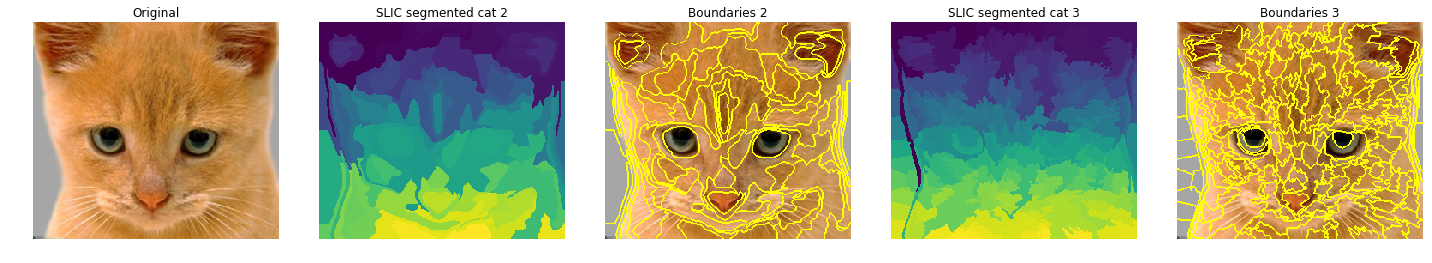

In [41]:
segmented_cat_slic2 = segmentation.slic(cat_img, n_segments=100, compactness=0.5, sigma=3)
segmented_cat_slic3 = segmentation.slic(cat_img, n_segments=300, compactness=2, sigma=0.5)

%matplotlib inline

f, cat = plt.subplots(ncols=5, figsize=(20,10)) 
cat[0].imshow(cat_img)
cat[0].set_title("Original")
cat[0].axis('off')

cat[1].imshow(segmented_cat_slic2)
cat[1].set_title("SLIC segmented cat 2")
cat[1].axis('off')

cat[2].imshow(segmentation.mark_boundaries(cat_img, segmented_cat_slic2))
cat[2].set_title("Boundaries 2")
cat[2].axis('off')

cat[3].imshow(segmented_cat_slic3)
cat[3].set_title("SLIC segmented cat 3")
cat[3].axis('off')

cat[4].imshow(segmentation.mark_boundaries(cat_img, segmented_cat_slic3))
cat[4].set_title("Boundaries 3")
cat[4].axis('off')

plt.tight_layout()
plt.show()

(0.3 points) - How does each parameter behave? 


The parameter n_segments means the number of labels in the segmented output images, the sigma is the width of 
Gaussian kernel used in preprocessing and the compactness is the balances color proximity and space proximity.

(0.2 points) - Comment what algorithm is the method based in up to 3 lines.

(0.3 points) c) Plot the original image and the results of both algorithms in a 1x3 subplot. 



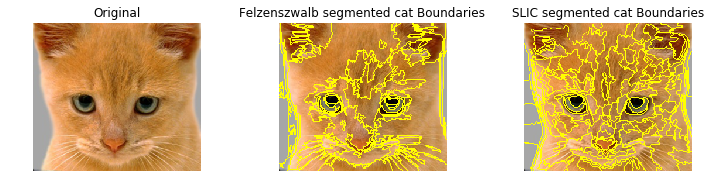

In [37]:
%matplotlib inline

f, cat = plt.subplots(ncols=3, figsize=(10,10)) 
cat[0].imshow(cat_img)
cat[0].set_title("Original")
cat[0].axis('off')

cat[1].imshow(segmentation.mark_boundaries(cat_img,segmented_cat))
cat[1].set_title("Felzenszwalb segmented cat Boundaries")
cat[1].axis('off')

cat[2].imshow(segmentation.mark_boundaries(cat_img, segmented_cat_slic))
cat[2].set_title("SLIC segmented cat Boundaries")
cat[2].axis('off')

plt.tight_layout()
plt.show()

(0.4 points) d) Calculate also the number of segments obtained on the image by each of the algorithms. 

In [50]:
print("Number of segments of Felzenszwalb:",len(np.unique(segmented_cat)), "Segments")
print("Number of segments SLIC:",len(np.unique(segmented_cat_slic)),"Segments")

# Depending of the parametres of the two methods we obtain a different number of segments, in our exemple we obtained a
# similar number and in the result it can be observed that the SLIC algorithm presents a better segmentation.

Number of segments of Felzenszwalb: 133 Segments
Number of segments SLIC: 117 Segments


(0.4 points) e) Comment the differences between each method as well as their advantages and disadvantages.

We can observe that the SLIC segmentation method creates more segments than the Felzenszwalb, because of that, the segmentation is more precise. Meanwhile the Felzenszwalb segments are fewer but the segments collects the big details of the image.